### IMPORTING THE RELEVANT LIBRARIES

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

### IMPORTING THE DATASET

In [73]:
data=pd.read_csv('ipl_matches.csv')
data.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [75]:
data.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [76]:
data.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [77]:
data.size

13608

In [78]:
data.shape

(756, 18)

### DATA CLEANING

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [80]:
data.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [81]:
data.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

### CAPITALIZE THE COLUMNS

In [82]:
#COLUMNS_CAPITALIZE
data.columns = data.columns.str.capitalize()

# Check the result
print(data.columns)

Index(['Id', 'Season', 'City', 'Date', 'Team1', 'Team2', 'Toss_winner',
       'Toss_decision', 'Result', 'Dl_applied', 'Winner', 'Win_by_runs',
       'Win_by_wickets', 'Player_of_match', 'Venue', 'Umpire1', 'Umpire2',
       'Umpire3'],
      dtype='object')


### REMOVING THE IRRELEVANT COLUMNS

In [83]:
# Drop 'umpire3','Umpire1','Umpire2' column (too many missing values)
data.drop(columns=['Umpire3','Umpire1','Umpire2'], inplace=True)
data.drop(columns=['Id'], inplace=True)

In [84]:
data.isnull().sum()

Season             0
City               7
Date               0
Team1              0
Team2              0
Toss_winner        0
Toss_decision      0
Result             0
Dl_applied         0
Winner             4
Win_by_runs        0
Win_by_wickets     0
Player_of_match    4
Venue              0
dtype: int64

### FILLING THE MISSING VALUES

In [85]:
data['Venue'].unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [86]:
data['City'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [87]:
data.fillna({
    "City": "Dubai",
    "Winner": "No Result",
    "Player_of_match": "Unknown"
}, inplace=True)

In [88]:
data.isnull().sum()

Season             0
City               0
Date               0
Team1              0
Team2              0
Toss_winner        0
Toss_decision      0
Result             0
Dl_applied         0
Winner             0
Win_by_runs        0
Win_by_wickets     0
Player_of_match    0
Venue              0
dtype: int64

In [89]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')  # Example: 25-04-2008

In [90]:
data.head(5)

,Season,City,Date,Team1,Team2,Toss_winner,Toss_decision,Result,Dl_applied,Winner,Win_by_runs,Win_by_wickets,Player_of_match,Venue
0,IPL-2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,IPL-2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,IPL-2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,IPL-2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,IPL-2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


### TEAM NAME MAPPING

In [91]:
data.Team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [92]:
team_name_map = {
    'Rising Pune Supergiant' : 'Rising Pune Supergiants',
    'Delhi Daredevils' : 'Delhi Capitals',
    'Pune Warriors' :'Rising Pune Supergiants',
   }

columns = ['Team1', 'Team2', 'Toss_winner', 'Winner']

for col in columns :
    data[col] = data[col].replace(team_name_map)

In [93]:
data.head()

,Season,City,Date,Team1,Team2,Toss_winner,Toss_decision,Result,Dl_applied,Winner,Win_by_runs,Win_by_wickets,Player_of_match,Venue
0,IPL-2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,IPL-2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,IPL-2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,IPL-2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,IPL-2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [94]:
data['Season'] = data['Season'].str.extract(r'(\d{4})').astype(int)

In [95]:
data.isnull().sum()

Season             0
City               0
Date               0
Team1              0
Team2              0
Toss_winner        0
Toss_decision      0
Result             0
Dl_applied         0
Winner             0
Win_by_runs        0
Win_by_wickets     0
Player_of_match    0
Venue              0
dtype: int64

In [96]:
# Replace variations with one standard name
# Standardize city names
data["City"] = data["City"].replace({"Bangalore": "Bengaluru"})


In [97]:
data['City'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bengaluru', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali'], dtype=object)

In [98]:
data.head(5)

,Season,City,Date,Team1,Team2,Toss_winner,Toss_decision,Result,Dl_applied,Winner,Win_by_runs,Win_by_wickets,Player_of_match,Venue
0,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,2017,Bengaluru,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


<Figure size 800x500 with 0 Axes>

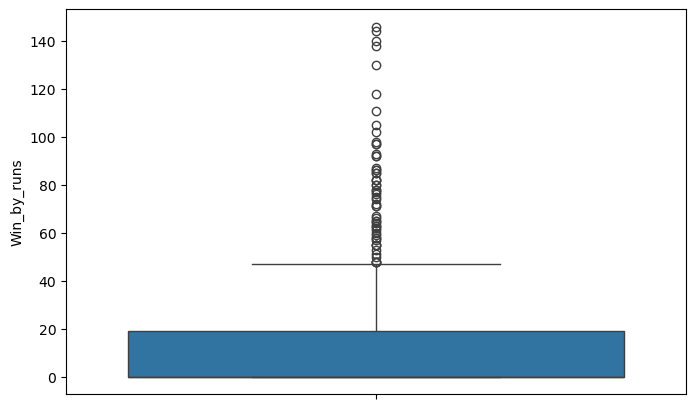

In [100]:
#FINDING OUTLIERS
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to visualize outliers
plt.figure(figsize=(8,5))
sns.boxplot(data['Win_by_runs'])
plt.show() 

### EDA

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

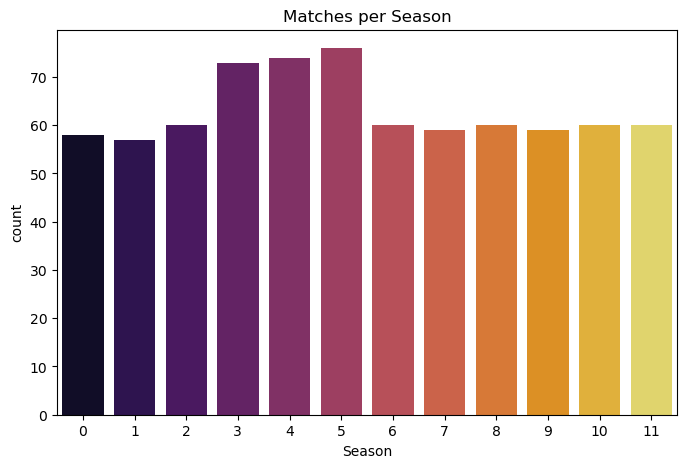

In [127]:
# Matches per Season (Bar Chart)
plt.figure(figsize=(8,5))
sns.countplot(x='Season', data=data, palette='inferno')
plt.title("Matches per Season")
plt.show()

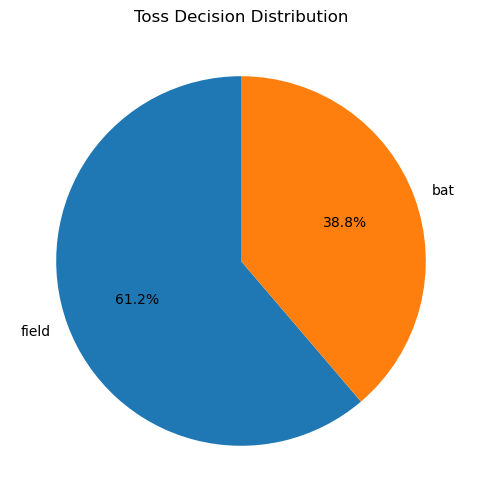

In [104]:
# Toss Decision Distribution (Pie Chart)
plt.figure(figsize=(6,6))
data['Toss_decision'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Toss Decision Distribution")
plt.ylabel("")
plt.show()

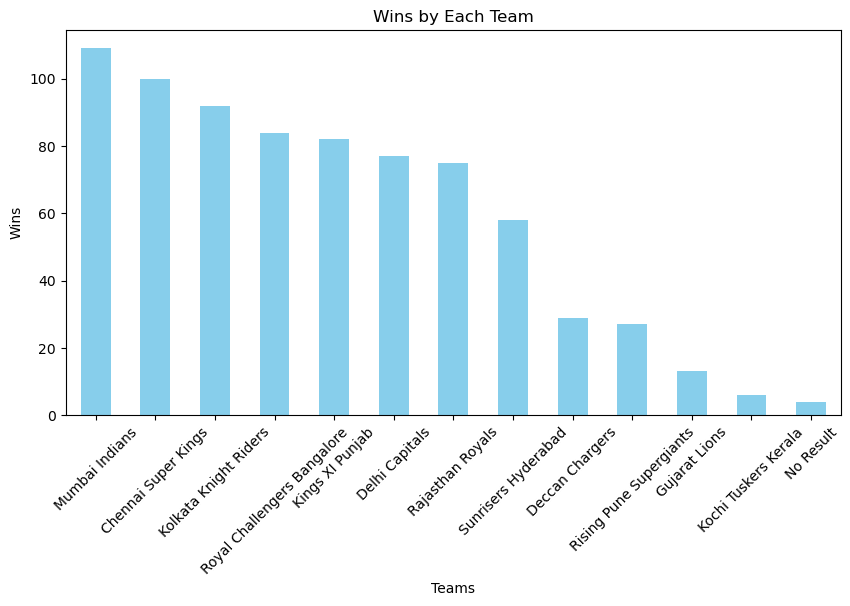

In [105]:
# Distribution of Wins by Team (Bar Chart)
plt.figure(figsize=(10,5))
data['Winner'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Wins by Each Team")
plt.xlabel("Teams")
plt.ylabel("Wins")
plt.xticks(rotation=45)
plt.show()

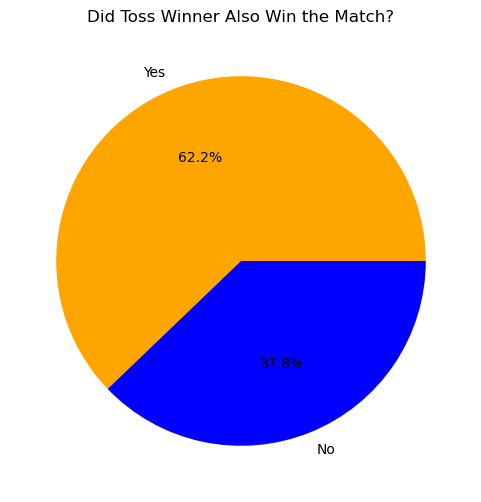

In [126]:
#Explore Correlations with Target (Winner)

# Create a new column to check if Toss Winner also won the Match
data['Toss_match_win'] = data['Toss_winner'] == data['Winner']

# Plot as Pie Chart
plt.figure(figsize=(6,6))
data['Toss_match_win'].value_counts().plot(kind='pie', labels=['Yes','No'], autopct='%1.1f%%', colors=['orange','blue'])
plt.title("Did Toss Winner Also Win the Match?")
plt.ylabel("")
plt.show()

In [108]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Season', 'City', 'Team1', 'Team2', 'Toss_winner',
                    'Toss_decision', 'Result', 'Winner', 'Player_of_match',
                    'Venue']

label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

# Check the transformed data
print(data.head())

   Season  City       Date  Team1  Team2  Toss_winner  Toss_decision  Result  \
0       9    14 2017-04-05     11     10           10              1       1   
1       9    26 2017-04-06      7      9            9              1       1   
2       9    28 2017-04-07      3      6            6              1       1   
3       9    15 2017-04-08      9      4            4              1       1   
4       9     2 2017-04-08     10      2           10              0       1   

   Dl_applied  Winner  Win_by_runs  Win_by_wickets  Player_of_match  Venue  \
0           0      12           35               0              225     28   
1           0      10            0               7              199     21   
2           0       6            0              10               34     31   
3           0       4            0               6               61     13   
4           0      11           15               0               99     17   

   Toss_match_win  
0           False  
1         

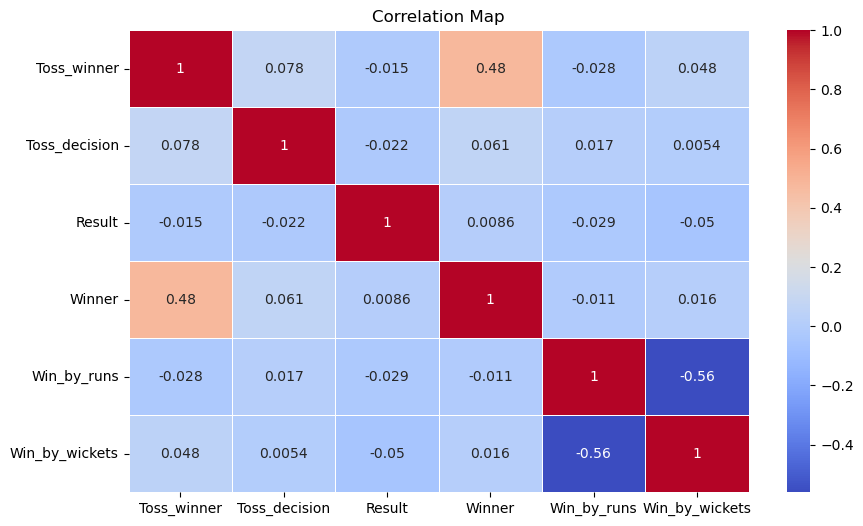

In [109]:
# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data[['Toss_winner',	'Toss_decision','Result','Winner',	'Win_by_runs',	'Win_by_wickets']].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Map")
plt.show()

### DATA PROCESSING

In [110]:
print(data.isnull().sum())

Season             0
City               0
Date               0
Team1              0
Team2              0
Toss_winner        0
Toss_decision      0
Result             0
Dl_applied         0
Winner             0
Win_by_runs        0
Win_by_wickets     0
Player_of_match    0
Venue              0
Toss_match_win     0
dtype: int64


In [111]:
data.head(5)

,Season,City,Date,Team1,Team2,Toss_winner,Toss_decision,Result,Dl_applied,Winner,Win_by_runs,Win_by_wickets,Player_of_match,Venue,Toss_match_win
0,9,14,2017-04-05,11,10,10,1,1,0,12,35,0,225,28,False
1,9,26,2017-04-06,7,9,9,1,1,0,10,0,7,199,21,True
2,9,28,2017-04-07,3,6,6,1,1,0,6,0,10,34,31,True
3,9,15,2017-04-08,9,4,4,1,1,0,4,0,6,61,13,True
4,9,2,2017-04-08,10,2,10,0,1,0,11,15,0,99,17,True


In [112]:
X = data[["Team1",'Team2','Toss_winner','Toss_decision',"Result","Win_by_runs","Win_by_wickets"]]# Features
y = data[["Winner"]]# Target
# Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### MODEL TRAINING

In [113]:
# Training Multiple Models
# -------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False)
}
results = []

for name, model in models.items():
    # For models sensitive to scaling, use scaled data. For tree-based models, use original data.
    # Given the current features are mostly encoded categorical, scaling might not be necessary or beneficial for tree models.
    # Let's use the original X_train and X_test as defined before.
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    rec = recall_score(y_test, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)

    results.append([name, acc,prec,rec,f1])
# -------------------------------
results_df = pd.DataFrame(results, columns=["Model", "Accuracy","precision","recall","f1_score"])
print(results_df)

                 Model  Accuracy  precision    recall  f1_score
0  Logistic Regression  0.184211   0.135914  0.184211  0.152303
1                  SVM  0.282895   0.252102  0.282895  0.253486
2                  KNN  0.493421   0.500570  0.493421  0.477345
3        Decision Tree  0.901316   0.906949  0.901316  0.897287
4        Random Forest  0.881579   0.895890  0.881579  0.873547
5              XGBoost  0.986842   0.988722  0.986842  0.987066


### MODEL EVALUATION

In [114]:
for name, model in models.items():
    y_pred = model.predict(X_test)

    print(f"\n--- {name} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


--- Logistic Regression ---
Confusion Matrix:
 [[14  3  4  0  1  0  4  0  0  0  0]
 [ 4  0  2  0  0  0  1  0  0  0  0]
 [ 4  0  2  0  0  0  4  0  0  0  0]
 [ 0  0  2  0  2  0  0  0  0  0  0]
 [ 4  0  2  0  1  0  8  0  0  2  0]
 [ 5  0  2  0  5  0  4  1  0  4  1]
 [ 5  0  0  0  2  0  3  1  0  6  2]
 [ 1  1  0  0  1  2  5  0  0  4  0]
 [ 0  0  1  0  0  0  4  0  0  4  0]
 [ 0  1  0  0  0  2  2  0  0  4  3]
 [ 0  0  0  0  0  1  5  0  0  2  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.54      0.44        26
           1       0.00      0.00      0.00         7
           2       0.13      0.20      0.16        10
           3       0.00      0.00      0.00         4
           4       0.08      0.06      0.07        17
           6       0.00      0.00      0.00        22
           7       0.07      0.16      0.10        19
           9       0.00      0.00      0.00        14
          10       0.00      0.00      0.00 

### CROSS VALIDATION

In [115]:
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier
import xgboost as xgb # Import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False )
}

results = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)    #4[train_fold],1[test_fold]

for name, model in models.items():
    print(f"Evaluating: {name}")

    acc = cross_val_score(model, X, y, cv=cv, scoring='accuracy').mean()
    prec = cross_val_score(model, X, y, cv=cv, scoring='precision_weighted', error_score='raise').mean()
    rec = cross_val_score(model, X, y, cv=cv, scoring='recall_weighted').mean()
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1_weighted').mean()

    results.append({
        'Model': name,
        'Accuracy': round(acc, 3),
        'Precision': round(prec, 3),
        'Recall': round(rec, 3),
        'F1 Score': round(f1, 3)
    })

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='Accuracy', ascending=False)
print(df_results)

Evaluating: Logistic Regression
Evaluating: SVM
Evaluating: KNN
Evaluating: Decision Tree
Evaluating: Random Forest
Evaluating: XGBoost
                 Model  Accuracy  Precision  Recall  F1 Score
5              XGBoost     0.972      0.971   0.972     0.970
3        Decision Tree     0.925      0.931   0.927     0.926
4        Random Forest     0.884      0.887   0.876     0.878
2                  KNN     0.474      0.452   0.474     0.453
1                  SVM     0.291      0.194   0.291     0.213
0  Logistic Regression     0.206      0.173   0.206     0.179


### MODEL COMPARISION

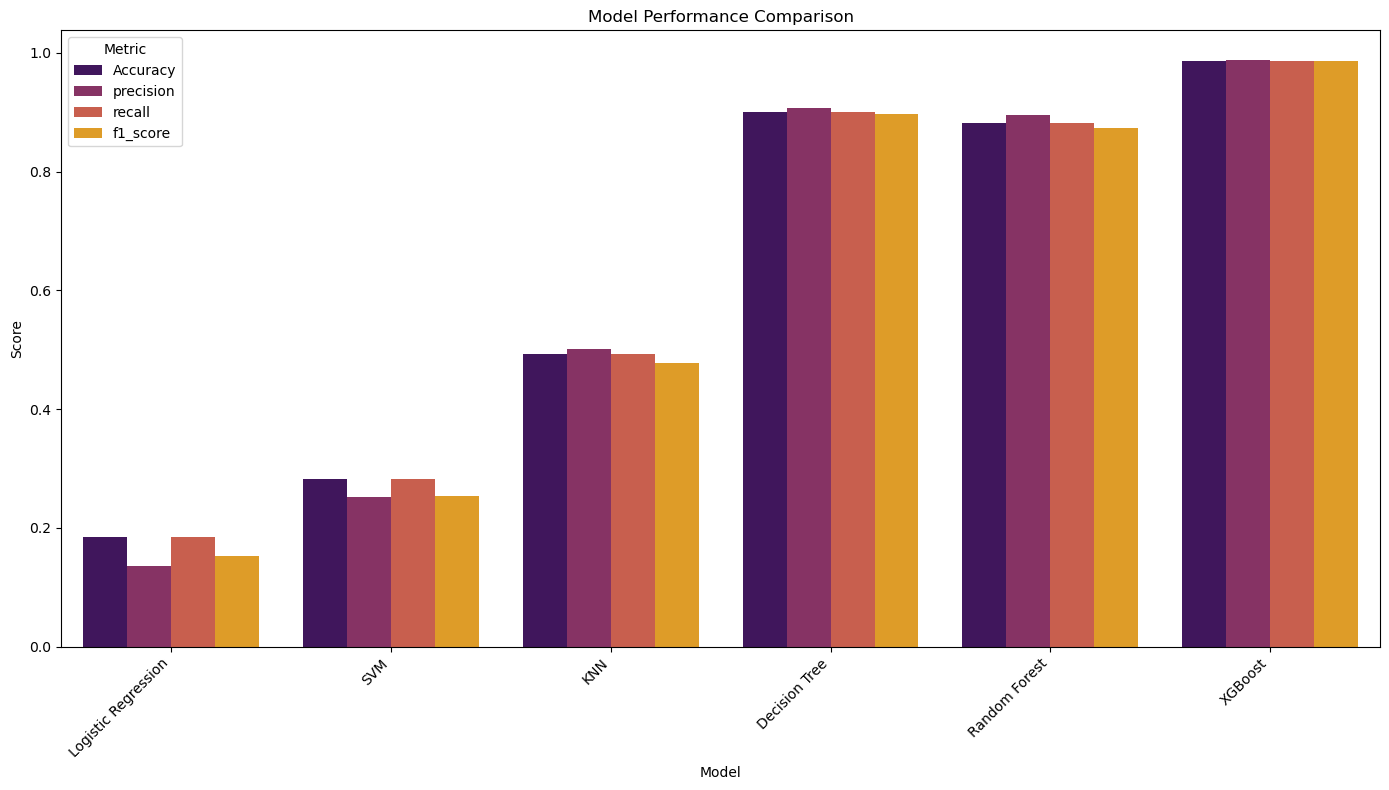

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the dataframe to have a single column for metrics
df_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted, palette='inferno')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

### HYPERPARAMETER TUNING

In [117]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb = XGBClassifier(use_label_encoder=False)
grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

print("Best Parameters and Accuracy Scores:")
print("XGBoost Best Params         :", grid_xgb.best_params_)
print("XGBoost Best Accuracy       :", grid_xgb.best_score_)


Best Parameters and Accuracy Scores:
XGBoost Best Params         : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
XGBoost Best Accuracy       : 0.9602564734085348


In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

tuned_models = {
    "XGBoost (Tuned)": grid_xgb.best_estimator_}

tuned_results = []

for name, model in tuned_models.items():
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    rec = recall_score(y_test, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)

    tuned_results.append([name, acc, prec, rec, f1])

tuned_results_df = pd.DataFrame(tuned_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print(tuned_results_df)

             Model  Accuracy  Precision    Recall  F1-Score
0  XGBoost (Tuned)  0.986842   0.988722  0.986842  0.987066


### SAVE THE MODEL

In [119]:
import joblib

# Save the best model
joblib.dump(xgb, "best_ipl_model.pkl")

print("Model saved successfully!")

Model saved successfully!


In [124]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
for col in data.columns:
    if data[col].dtype == "object":
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))

# Features and target
X = data[['Team1', 'Team2', 'Toss_winner', 'Toss_decision', 'Result', 'Win_by_runs', 'Win_by_wickets']]
y = data['Winner']

# Train/Test split (with stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y       #imbalance=balance
)

# Train XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)

# ---- Evaluate ----
y_pred = model.predict(X_test)
print(" Accuracy:", accuracy_score(y_test, y_pred))

# ---- Prediction Function ----
def predict_winner(team1, team2, toss_winner, toss_decision, result, win_by_runs, win_by_wickets):
    new_data = pd.DataFrame([{
        'Team1': team1,
        'Team2': team2,
        'Toss_winner': toss_winner,
        'Toss_decision': toss_decision,
        'Result': result,
        'Win_by_runs': win_by_runs,
        'Win_by_wickets': win_by_wickets
    }])
    pr = model.predict(new_data)
    return pr[0]


example_prediction = predict_winner(
    team1=4,   # example encoded team1
    team2=5,   # example encoded team2
    toss_winner=4,
    toss_decision=1,
    result=1,
    win_by_runs=40,
    win_by_wickets=50
)

print(" Predicted Match Winner (encoded value):", example_prediction)



 Accuracy: 0.9736842105263158
 Predicted Match Winner (encoded value): 4
